# 축산물 실시간 경매시황중계정보
---

#### 데이터 기간: 2013.01.01 - 2018.10.07

#### EDA

* 패키지 import 및 폰트 설정

In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

* 경로 설정

In [2]:
os.chdir(r"C:\Users\a0105\Desktop\DSC\ddd\data")

* data load

In [3]:
price = pd.read_csv("01. 축산물 실시간 경매시황중계정보.csv",encoding='cp949')

* data 구조 확인

In [4]:
# 데이터 확인 
price.head(5)

,경매시간,경매기준시분초,경매 구분,경매 구분 명,도매시장코드,도매시장명,한우 평균경매 금액,한우 평균경매 금액_상승하강,한우 1B+ 경매단가,한우 3B 경매단가,...,육우 전날 경매금액 차이,육우 경매 예상 두수,육우 경매 두수,돼지 박피 경매 금액,돼지 박피 전날 경매금액 차이,돼지 박피 경매 두수,돼지 탕박 경매 금액,돼지 탕박 전날 경매금액 차이,돼지 탕박 경매 두수,돼지 경매 두수
0,20181007,235916,753003,경매용+지육상장,1201,신흥산업,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20181007,235916,753003,경매용+지육상장,0905,농협고령,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20181007,235916,753003,경매용+지육상장,1005,김해축공,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20181007,235916,753003,경매용+지육상장,0613,관성(홍성),0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20181007,235916,753003,경매용+지육상장,0513,농협음성,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
## 자료 구조 확인 
# 각 열의 자료형과 메모리 사용량을 알 수 있음.
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34957 entries, 0 to 34956
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   경매시간              34957 non-null  int64 
 1   경매기준시분초           34957 non-null  int64 
 2   경매 구분             34957 non-null  int64 
 3   경매 구분 명           34957 non-null  object
 4   도매시장코드            34957 non-null  object
 5   도매시장명             34957 non-null  object
 6   한우 평균경매 금액        34957 non-null  int64 
 7   한우 평균경매 금액_상승하강   34957 non-null  int64 
 8   한우 1B+ 경매단가       34957 non-null  int64 
 9   한우 3B 경매단가        34957 non-null  int64 
 10  한우 경매 예상 두수       34957 non-null  int64 
 11  한우 경매 낙찰 두수       34957 non-null  int64 
 12  육우 경매 금액          34957 non-null  int64 
 13  육우 전날 경매금액 차이     34957 non-null  int64 
 14  육우 경매 예상 두수       34957 non-null  int64 
 15  육우 경매 두수          34957 non-null  int64 
 16  돼지 박피 경매 금액       34957 non-null  int64 
 17  돼지 박피 전날 경매금

* 총 34,957개의 행과 23개의 열을 가지고 있음.   
* 모든 열에 null값 없음

In [6]:
# 필요한 컬럼만 추출 
price2 = price[['경매시간','경매 구분 명','도매시장명','한우 평균경매 금액','돼지 박피 경매 금액','돼지 탕박 경매 금액']]

#### 변수 설명

- 경매구분명
    - 경매용: 산지
    - 지육상장용: 도체
        - 소나 돼지 같은 것을 도살하여 머리·내장·족(足)을 잘라 내고 아직 각을 뜨지 않은 고기	

* 돼지 박피, 돼지 탕박
    - 돼지 박피: 도축과정에서 인력이나 기계로 돼지가죽을 벗기는 작업 방식
        - 돼지 박피는 2017.12.11 부로 전면 중단된 방식 
    - 돼지 탕박: 뜨거운 물에 담그거나 물을 뿌려 털을 뽑는 도축 방식
    
    ##### 돼지 박피는 중단된 방식이기 때문에 공통적인 돼지 탕박만 볼 것임.

In [7]:
del price2['돼지 박피 경매 금액']

In [8]:
# 경매용과 지육상장용 데이터셋 생성
price2 = price2[price2['경매 구분 명']=='경매용+지육상장']

In [9]:
price2.head()

,경매시간,경매 구분 명,도매시장명,한우 평균경매 금액,돼지 탕박 경매 금액
0,20181007,경매용+지육상장,신흥산업,0,0
1,20181007,경매용+지육상장,농협고령,0,0
2,20181007,경매용+지육상장,김해축공,0,0
3,20181007,경매용+지육상장,관성(홍성),0,0
4,20181007,경매용+지육상장,농협음성,0,0


#### 시각화

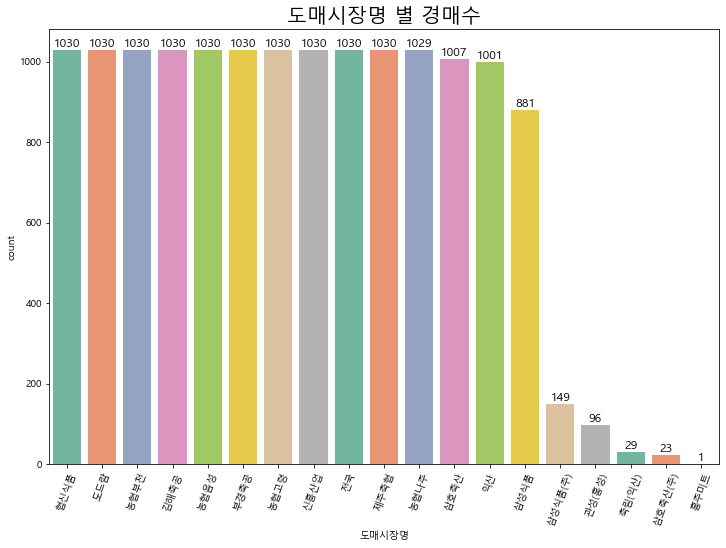

In [10]:
# 시각화 화면 키우기 
plt.figure(figsize=(12,8))

# x축 글자 회전
plt.xticks(rotation = 70 )
# 값 내림차순 정렬
order_ = price2['도매시장명'].value_counts().sort_values(ascending=False).index
ax = sns.countplot(x = '도매시장명', data = price2, order = order_ ,palette ='Set2')

# 제목 설정
ax.set_title('도매시장명 별 경매수', fontsize = 20)

# 값 표시 
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

In [11]:
# 경매시간 자료형을 날짜로 변환
price2['경매시간'] = pd.to_datetime(price2['경매시간'],format='%Y%m%d')
price2['year'] = price2['경매시간'].dt.year
price2['month'] = price2['경매시간'].dt.month

# 도매시장명이 전국인 것만 추출 
price_jeoun = price2[price2['도매시장명']=='전국']

* '도매시장명: 전국'을 사용하는 이유는 가축사육현황 데이터가 지역별로 나눠져 있지 않기 때문.

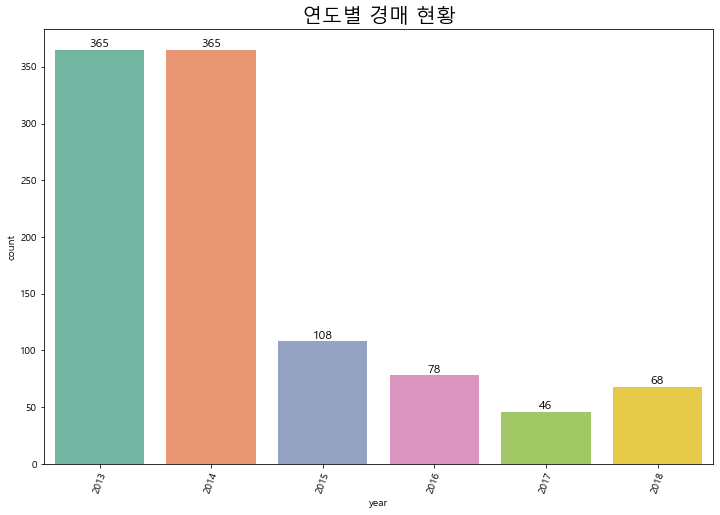

In [12]:
plt.figure(figsize=(12,8))

plt.xticks(rotation = 70 )

ax = sns.countplot(x='year',data=price_jeoun, palette ='Set2')

ax.set_title('연도별 경매 현황',fontsize = 20)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
    
plt.show()

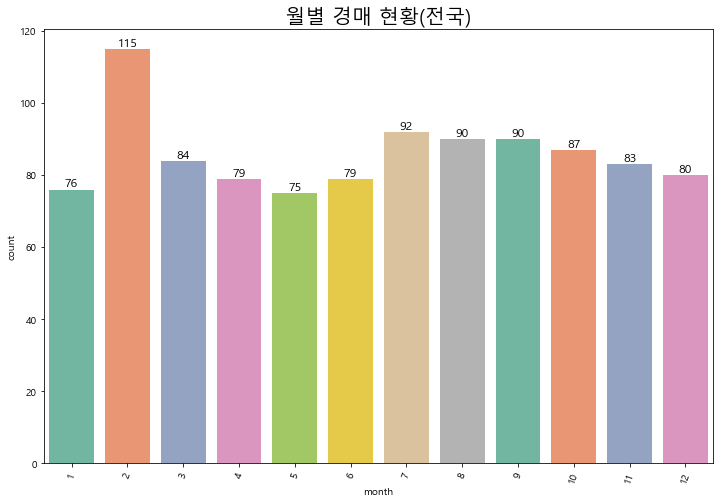

In [13]:
plt.figure(figsize=(12,8))

plt.xticks(rotation=70)
ax = sns.countplot(x='month',data=price_jeoun,palette='Set2')
ax.set_title('월별 경매 현황(전국)',fontsize = 20)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

* 월별, 연도별 경매현황이 일정하지 않은 이유는 경매시장이 안열릴 때도 있기 때문이다.   
* 비어있는 일자는 신경쓰지 않고 분석이 가능하다.

Text(0.5, 1.0, '일별 한우 평균경매 금액 추이(전국)')

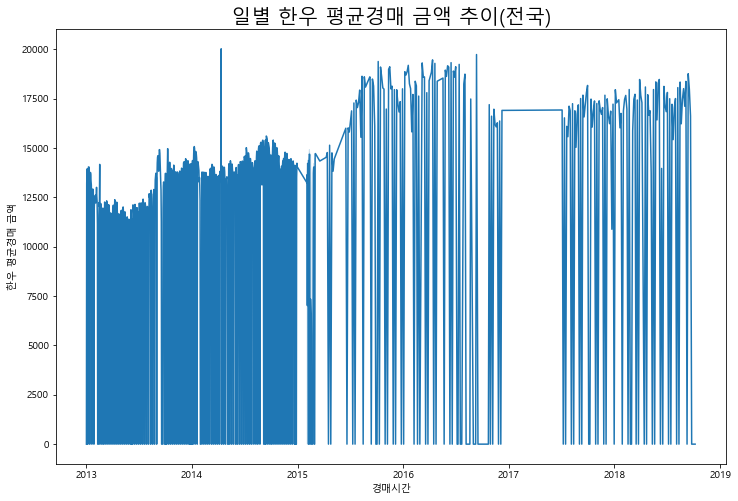

In [14]:
plt.figure(figsize=(12,8))

ax = sns.lineplot(x='경매시간',y = '한우 평균경매 금액',data=price_jeoun)

ax.set_title('일별 한우 평균경매 금액 추이(전국)',fontsize = 20)

* 경매시장이 문닫는 날도 있기 때문에 그래프 모양이 이상한 것
* 문닫는날은 제외하고 plot

In [15]:
price_jeoun2 = price_jeoun[price_jeoun['한우 평균경매 금액']!=0]

In [16]:
price_jeoun2.shape

(720, 7)

In [17]:
price_jeoun2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 61 to 34896
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   경매시간         720 non-null    datetime64[ns]
 1   경매 구분 명      720 non-null    object        
 2   도매시장명        720 non-null    object        
 3   한우 평균경매 금액   720 non-null    int64         
 4   돼지 탕박 경매 금액  720 non-null    int64         
 5   year         720 non-null    int64         
 6   month        720 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 45.0+ KB


Text(0.5, 1.0, '일별 한우 평균경매 금액 추이(전국)')

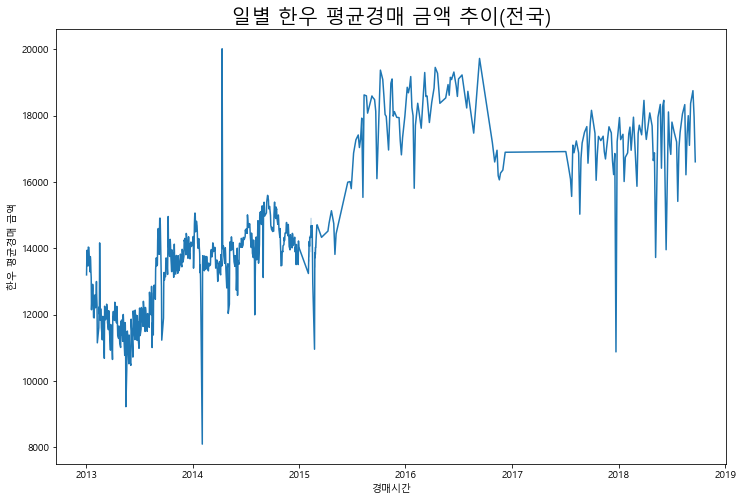

In [18]:
plt.figure(figsize=(12,8))

ax = sns.lineplot(x='경매시간',y = '한우 평균경매 금액',data=price_jeoun2)

ax.set_title('일별 한우 평균경매 금액 추이(전국)',fontsize = 20)

* 전체적으로 한우 평균금액이 증가하는 추세를 보이는듯하나 2016년에 비해 다소 감소
* 2014년에 눈에 띄는 peak가 2번, 2015년에 1번, 2018년에 3번 정도 보임
* 경매 가격에 특정 패턴이 있어 보이진 않음.

* 위 그래프를 좀 더 구체적으로 보기 위함.

Text(0.5, 1.0, '일별 한우 평균경매 금액 추이(전국_2014년)')

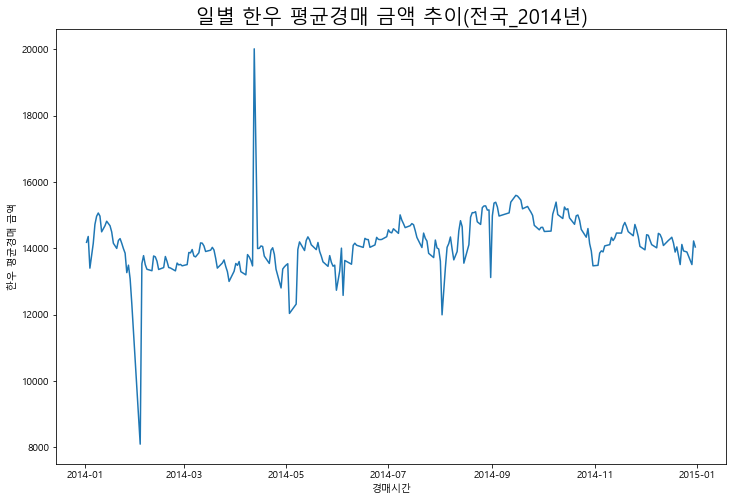

In [19]:
plt.figure(figsize=(12,8))

ax = sns.lineplot(x='경매시간',y = '한우 평균경매 금액',data = price_jeoun2[price_jeoun2['year']==2014])

ax.set_title('일별 한우 평균경매 금액 추이(전국_2014년)',fontsize = 20)

Text(0.5, 1.0, '일별 한우 평균경매 금액 추이(전국_2015년)')

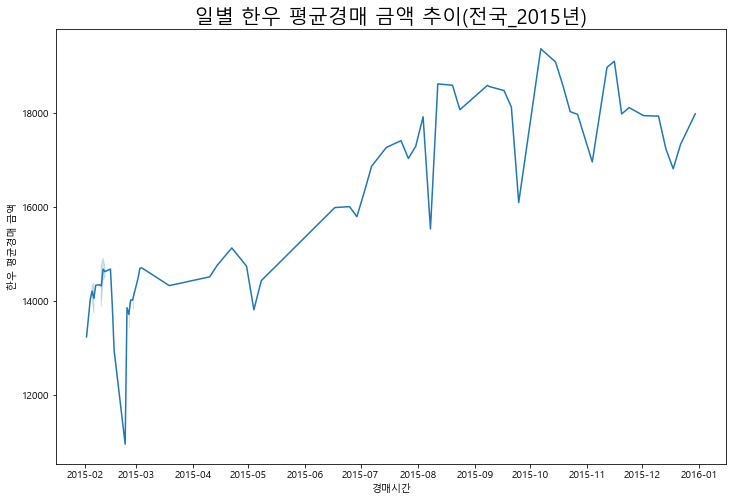

In [20]:
plt.figure(figsize=(12,8))

ax = sns.lineplot(x='경매시간',y = '한우 평균경매 금액',data = price_jeoun2[price_jeoun2['year']==2015])

ax.set_title('일별 한우 평균경매 금액 추이(전국_2015년)',fontsize = 20)

* 2014년과 2015년 모두 2월과 3월 사이, 8월과 9월 사이(9월 오르기 직전) 잠깐 내려가는 형태를 보임.

Text(0.5, 1.0, '일별 한우 평균경매 금액 추이(전국_2018년)')

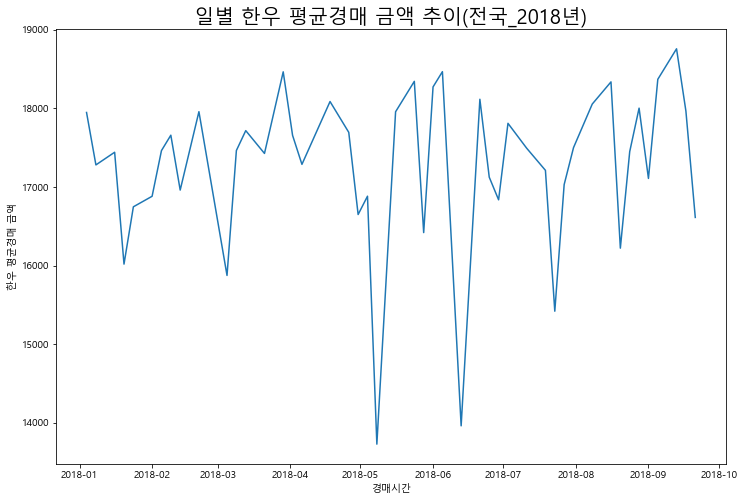

In [21]:
plt.figure(figsize=(12,8))

ax = sns.lineplot(x='경매시간',y = '한우 평균경매 금액',data = price_jeoun2[price_jeoun2['year']==2018])

ax.set_title('일별 한우 평균경매 금액 추이(전국_2018년)',fontsize = 20)

In [22]:
group_mean = price_jeoun2.groupby(['year','month']).mean()

In [23]:
group_mean_reset = pd.DataFrame(group_mean).reset_index()

In [24]:
group_mean_reset

,year,month,한우 평균경매 금액,돼지 탕박 경매 금액
0,2013,1,13091.958333,2986.791667
1,2013,2,12161.380952,2751.142857
2,2013,3,11789.850000,2808.100000
3,2013,4,11731.409091,3516.136364
4,2013,5,11229.043478,3385.000000
...,...,...,...,...
57,2018,5,16665.600000,4809.400000
58,2018,6,17129.000000,4423.333333
59,2018,7,17076.833333,5208.666667
60,2018,8,17612.400000,5277.000000


Text(0.5, 1.0, '연도별 월별 한우 평균경매 금액')

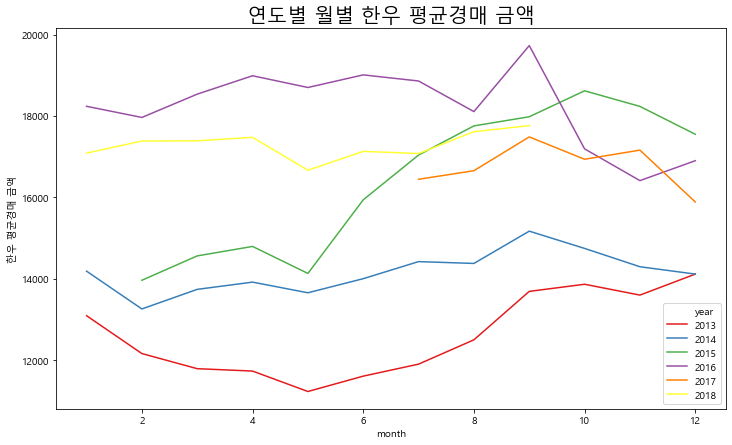

In [25]:
plt.figure(figsize=(12,7))

# sns.set_style("whitegrid")

sns.lineplot(x='month',y='한우 평균경매 금액', hue='year', markers=True,data = group_mean_reset, palette='Set1')

ax = plt.gca()

ax.set_title("연도별 월별 한우 평균경매 금액",fontsize=20)


* 전체적으로 5월에 가격이 가장 낮고 특일 정보와 확인해봐야겠지만 추석이 있을 것이라 추정되는 9월이 가장 높음.

Text(0.5, 1.0, '연도별 월별 한우 평균경매 금액')

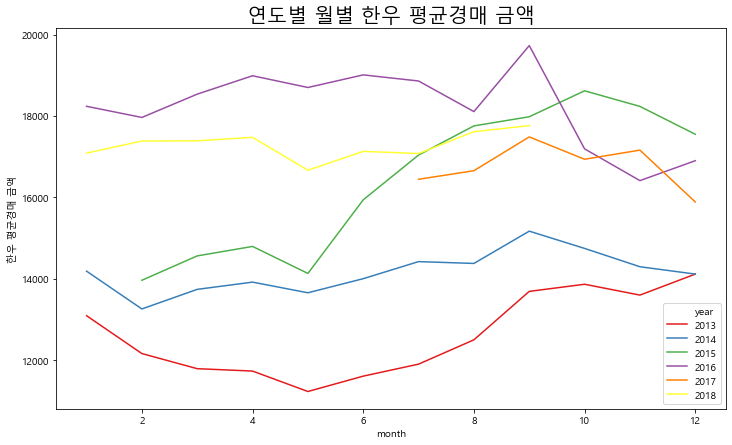

In [26]:
plt.figure(figsize=(12,7))

# sns.set_style("whitegrid")

sns.lineplot(x='month',y='한우 평균경매 금액', hue='year', markers=True,data = group_mean_reset, palette='Set1')

ax = plt.gca()

ax.set_title("연도별 월별 한우 평균경매 금액",fontsize=20)


Text(0.5, 1.0, '연도별 월별 돼지 탕박 경매 금액')

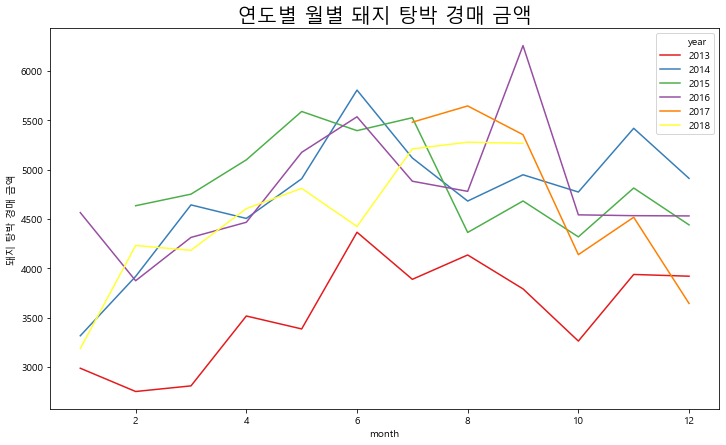

In [28]:
plt.figure(figsize=(12,7))

# sns.set_style("whitegrid")

sns.lineplot(x='month',y='돼지 탕박 경매 금액', hue='year', markers=True,data = group_mean_reset, palette='Set1')

ax = plt.gca()

ax.set_title("연도별 월별 돼지 탕박 경매 금액",fontsize=20)


In [30]:
group_mean_reset

,year,month,한우 평균경매 금액,돼지 탕박 경매 금액
0,2013,1,13091.958333,2986.791667
1,2013,2,12161.380952,2751.142857
2,2013,3,11789.850000,2808.100000
3,2013,4,11731.409091,3516.136364
4,2013,5,11229.043478,3385.000000
...,...,...,...,...
57,2018,5,16665.600000,4809.400000
58,2018,6,17129.000000,4423.333333
59,2018,7,17076.833333,5208.666667
60,2018,8,17612.400000,5277.000000


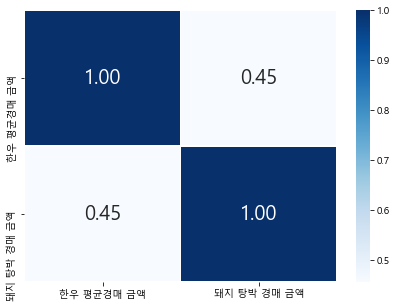

In [42]:
corr_data = group_mean_reset.drop(["year","month"], axis=1)
corr = corr_data.corr()

plt.figure(figsize=(7,5))

sns.heatmap(data = corr, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues' , annot_kws={"size": 20})

* 시각화상으로 돼지 탕박 경매 금액과 한우 평균 경매 금액의 관련성을 추정하기 모호했으나 상관성 검정결과 둘 사이의 상관성은 0.45로 양의 상관관계를 가진다고 할 수 있음. 